In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from numpy import nan, inf





In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula = LinearSegmentedColormap.from_list('parula', cm_data)

1050625


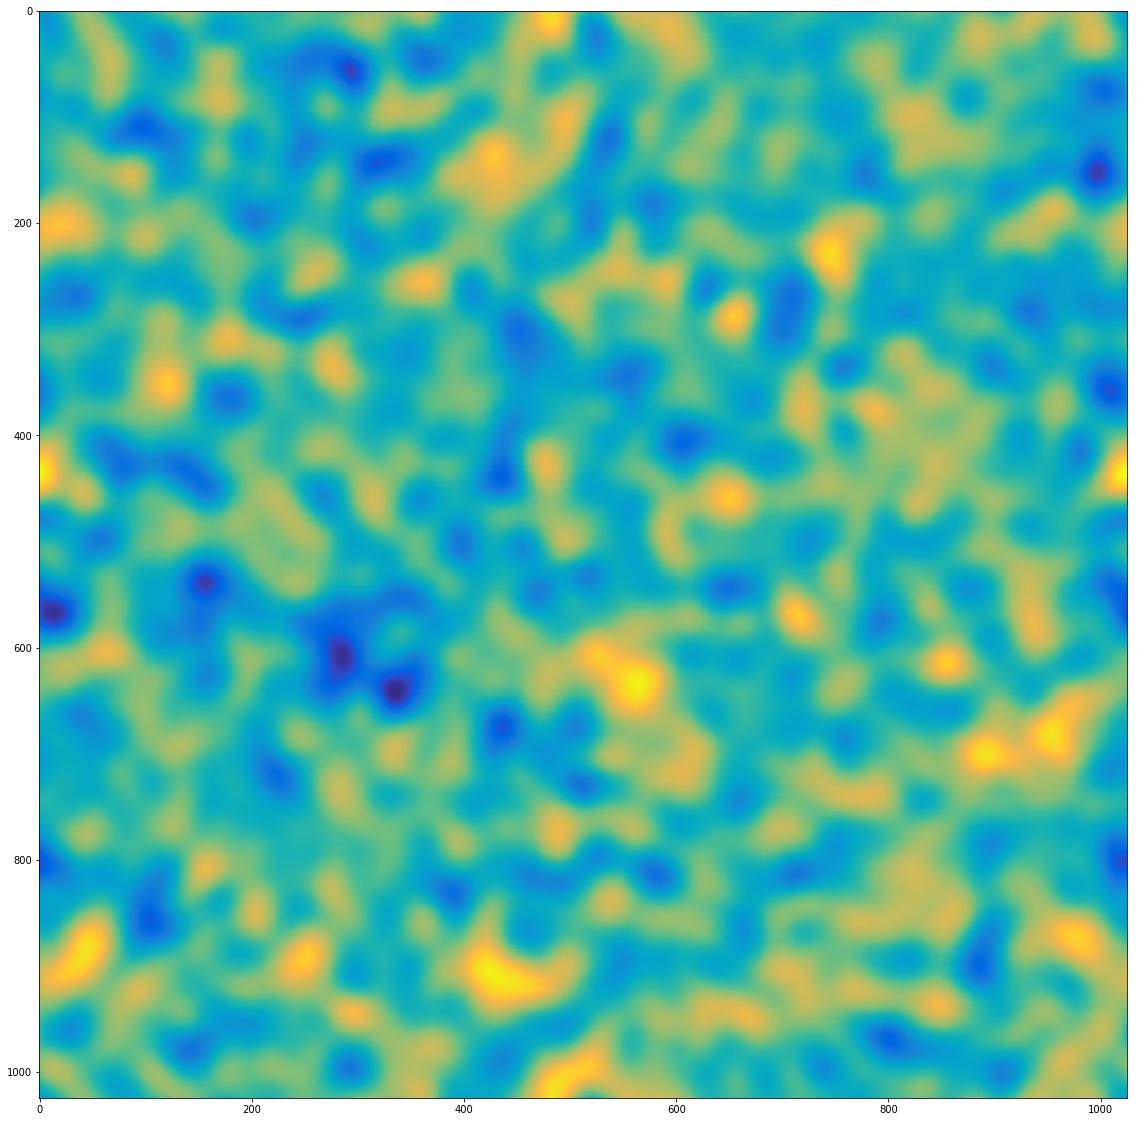

In [16]:
def make_diffuser_surface(M, sigma):
    #M = 1025;
    #sigma = .02;

    seeds = np.random.rand(M,M)
    seeds_ft = np.fft.fft2(seeds)
    fx = np.linspace(-1,1,M)

    filt_f = np.exp(-.5*np.square(fx/sigma))
    filt_n = filt_f/np.sum(filt_f)
    filt_2d = np.fft.ifftshift(np.outer(filt_n,filt_n))
    surf_out = np.fft.ifft2(filt_2d*seeds_ft)
    s = np.shape(filt_2d)
    return surf_out

diffuser_surface = .5*make_diffuser_surface(1025,.02)

fig1 = plt.imshow(np.real(diffuser_surface), interpolation="nearest", cmap=parula,
    vmin=np.min(np.min(np.abs(diffuser_surface))),
    vmax=np.max(np.max(np.abs(diffuser_surface))))
fig = plt.gcf()
fig.set_size_inches(20,20)
print(diffuser_surface.size)

-200000.0


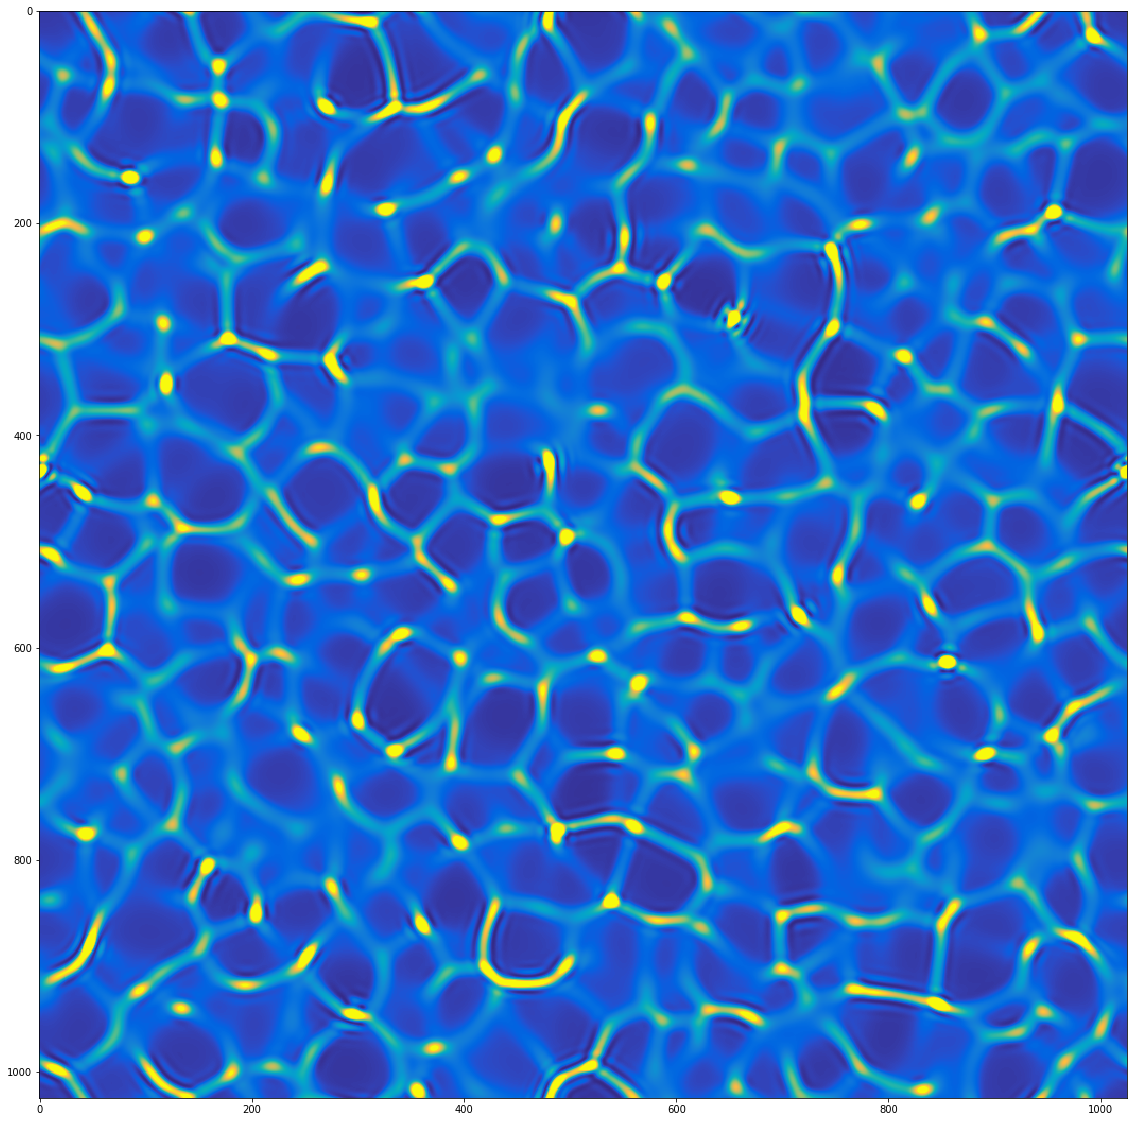

In [17]:
from IPython import display
from drawnow import drawnow
import time
import pylab as pl

lam = 532e-9
ps = 2.5e-6
z = 5000e-6
U = np.exp(1j*k*diffuser_surface*1e-1/2)

def propagate_field(lam, ps, z, U):
    k = 2*np.pi/lam   
    siz = np.shape(U)
    fx = np.linspace(-1/2/ps,1/2/ps,siz[1])
    fy = np.linspace(-1/2/ps,1/2/ps,siz[0])
    print(np.min(fx))
    x = np.linspace(-siz[1]/2*ps,siz[1]/2*ps,siz[1])
    y = np.linspace(-siz[0]/2*ps,siz[0]/2*ps,siz[0])
    X,Y = np.meshgrid(x,y)
    Fx,Fy = np.meshgrid(fx,fy)

    zvec = np.linspace(1e-6,10000e-6,10)
#myobj = plt.imshow(np.abs(U))

#for z in zvec:
    #qphase = np.exp(1j*k/2/z*(np.square(X)+np.square(Y)))
    #Uf = np.fft.fftshift(np.exp(1j*k*z)/(1j*lam*z) * np.exp(1j*(np.square(Fx)+
#    np.square(Fy)))*np.fft.fft2(U * qphase))
    Uf = np.fft.fftshift(np.fft.fft2(U))
    Hf = np.exp(1j*2*np.pi*z/lam * np.sqrt(1-(lam*Fx)**2 - (lam*Fy)**2))

    Up = np.fft.ifft2(np.fft.ifftshift(Uf*Hf))
    return Up

Up = propagate_field(lam, ps, z, U)

Ip = np.abs(Up)**2
plt.close(fig)
plt.imshow(Ip,cmap=parula,vmin=0,vmax=np.percentile(Ip,99))

fig = plt.gcf()
fig.set_size_inches(20,20)

plt.show()


